## imports

In [1]:
# TODO
# filter out saturated return afterpulses 

In [2]:
import argparse
import icelakes
from icelakes.utilities import encedc, decedc
from icelakes.nsidc import download_granule, edc
from icelakes.detection import read_atl03, detect_lakes, melt_lake

## parsing arguments from command line

In [3]:
parser = argparse.ArgumentParser(description='Test script to print some stats for a given ICESat-2 ATL03 granule.')
parser.add_argument('--granule', type=str, default='ATL03_20210715182907_03381203_005_01.h5',
                    help='The producer_id of the input ATL03 granule')
parser.add_argument('--polygon', type=str, default='geojsons/jakobshavn_small.geojson',
                    help='The file path of a geojson file for spatial subsetting')
parser.add_argument('--IS2datadir', type=str, default='IS2data',
                    help='The directory into which to download ICESat-2 granules')
parser.add_argument('--download_gtxs', type=str, default='all',
                    help='String value or list of gtx names to download, also accepts "all"')

# set arguments as class for now, to run in jupyter
if parser.prog == 'ipykernel_launcher.py':
    class Args:
        granule = 'ATL03_20210715182907_03381203_005_01.h5'
        polygon = 'geojsons/jakobshavn_test.geojson'
        IS2datadir =  'IS2data'
        download_gtxs = 'all'
    args=Args()
else:
    args = parser.parse_args()

In [4]:
# args.granule = 'ATL03_20200116042313_03120610_005_01.h5'
# args.granule = 'ATL03_20200116171056_03200612_005_01.h5'
# args.polygon = 'geojsons/nivlisen_test.geojson'

# args.granule = 'ATL03_20200204085006_06050610_005_01.h5'
# args.granule = 'ATL03_20191229231828_00490612_005_01.h5'	
# args.granule = 'ATL03_20191229103045_00410610_005_01.h5'
# args.granule = 'ATL03_20200131214610_05520612_005_01.h5'
# args.granule = 'ATL03_20200131085827_05440610_005_01.h5'
# args.granule = 'ATL03_20200127090648_04830610_005_01.h5'
# args.granule = 'ATL03_20200127215431_04910612_005_01.h5'
# args.granule = 'ATL03_20200102102224_01020610_005_01.h5'
# args.granule = 'ATL03_20200102231007_01100612_005_01.h5'
# args.granule = 'ATL03_20220224205325_09861410_005_01.h5'
# args.granule = 'ATL03_20200204213749_06130612_005_01.h5'
# args.polygon = 'geojsons/georgeVI_test.geojson'

args.granule = 'ATL03_20190102184312_00810210_005_01.h5'
# # args.granule = 'ATL03_20190103073055_00890212_005_01.h5'
args.polygon = 'geojsons/amery_test.geojson'
# args.polygon = 'geojsons/amery_1lake_test.geojson'

# args.granule = 'ATL03_20210715182907_03381203_005_01.h5'
# args.granule = 'ATL03_20210809171331_07191203_005_01.h5'
# args.granule = 'ATL03_20210802061504_06051205_005_01.h5'
# args.polygon = 'geojsons/jakobshavn_test.geojson'

args.granule = 'ATL03_20190822144852_08480405_005_01.h5'
# args.granule = 'ATL03_20210831140621_10531203_005_01.h5'
args.polygon = 'geojsons/79N_test.geojson'

# args.granule = 'ATL03_20200224204246_09180610_005_01.h5'
# args.polygon = 'geojsons/shackleton_test.geojson'

############################################################
# args.granule = 'ATL03_20210822035912_09091205_005_01.h5'
# args.polygon = 'geojsons/GrIS-NE-1lake-test.geojson'
# args.polygon = 'geojsons/GrIS-NE-test.geojson'

# args.granule = 'ATL03_20200116042313_03120610_005_01.h5'
# args.granule = 'ATL03_20200116171056_03200612_005_01.h5'
# args.polygon = 'geojsons/nivlisen_test.geojson'

## download data from NSIDC

In [5]:
%%time
# input_filename = download_granule(args.granule, args.download_gtxs, args.polygon, args.IS2datadir, decedc(edc().u), decedc(edc().p))
# just to not have to re-download nsidc data while testing
input_filename = args.IS2datadir + '/' + 'processed_' + args.granule
# print(input_filename)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs


## read in the data

In [6]:
%%time
photon_data, bckgrd_data, ancillary = read_atl03(input_filename, geoid_h=True)
gtx_list = list(photon_data.keys())
lake_list = []
for gtx in gtx_list:
    lake_list += detect_lakes(photon_data, gtx, ancillary, args.polygon, verbose=False)

  reading in IS2data/processed_ATL03_20190822144852_08480405_005_01.h5
  reading in beam: gt1l gt1r gt2l gt2r gt3l gt3r  --> done.
  Ground Tracks to process: gt1l, gt1r, gt2l, gt2r, gt3l, gt3r
CPU times: user 2.87 s, sys: 549 ms, total: 3.42 s
Wall time: 3.36 s


In [41]:
# vars(lake)

In [23]:
len('ATL03_20190822144852_08480405_005_01.h5')

39

In [ ]:
'mframe_start': 219511169,
 'mframe_end': 219511176,
 'main_peak': 298.1453618258017,
 'n_subsegs_per_mframe': 10,
 'rgt': 848,
 'gtx': 'gt2r',
 'polygon_filename': 'geojsons/79N_test.geojson',
 'polygon_name': '79N_test',
 'beam_number': 4,
 'beam_strength': 'weak',
 'cycle_number': 4,
 'sc_orient': 'backward',
 'dead_time': 3.0525e-09,
 'dead_time_meters': 0.4575582390225,
 'photon_data':              lat        lon           h            dt     mframe  ph_id_pulse  \
 0      79.099935 -21.884912   -6.646666  5.172055e+07  219511169            1   
 1      79.099932 -21.884912  123.536894  5.172055e+07  219511169            1   
 2      79.099931 -21.884911  152.235123  5.172055e+07  219511169            1   
 3      79.099931 -21.884911  169.133791  5.172055e+07  219511169            1   
 4      79.099930 -21.884911  207.248434  5.172055e+07  219511169            1   
 ...          ...        ...         ...           ...        ...          ...   
 29342  79.089955 -21.895447  304.832101  5.172055e+07  219511176          200   
 29343  79.089955 -21.895447  304.845772  5.172055e+07  219511176          200   
 29344  79.089951 -21.895446  471.812860  5.172055e+07  219511176          200   
 29345  79.089951 -21.895446  500.124325  5.172055e+07  219511176          200   
 29346  79.089947 -21.895445  666.257886  5.172055e+07  219511176          200   
 
        qual         xatc      geoid  specular       snr  
 0         0     0.000000  28.641219     False  0.055568  
 1         0     0.329233  28.641207     False  0.082893  
 2         0     0.401796  28.641204     False  0.005511  
 3         0     0.444506  28.641202     False  0.000000  
 4         0     0.540888  28.641199     False  0.013230  
 ...     ...          ...        ...       ...       ...  
 29342     0  1136.297044  28.599387     False  0.987444  
 29343     0  1136.297080  28.599387     False  0.987876  
 29344     0  1136.719164  28.599372     False  0.000000  
 29345     0  1136.790709  28.599369     False  0.013610  
 29346     0  1137.210580  28.599353     False  0.000000  
 
 [29347 rows x 11 columns],
 'mframe_data':                  lat        lon         xatc            dt  \
 mframe                                                       
 219511169  79.099306 -21.885564    71.819298  5.172055e+07   
 219511170  79.098061 -21.886878   214.011309  5.172055e+07   
 219511171  79.096804 -21.888218   355.859183  5.172055e+07   
 219511172  79.095561 -21.889525   497.735448  5.172055e+07   
 219511173  79.094311 -21.890828   639.768573  5.172055e+07   
 219511174  79.093068 -21.892149   781.730268  5.172055e+07   
 219511175  79.091827 -21.893465   923.874683  5.172055e+07   
 219511176  79.090562 -21.894806  1065.879663  5.172055e+07   
 
                            time    xatc_min     xatc_max  n_phot  \
 mframe                                                             
 219511169  2019-08-22, 15:49:07    0.000000   143.638596    4000   
 219511170  2019-08-22, 15:49:07  142.544434   285.478184    3892   
 219511171  2019-08-22, 15:49:07  284.469646   427.248721    3854   
 219511172  2019-08-22, 15:49:07  426.129967   569.340928    3663   
 219511173  2019-08-22, 15:49:07  568.290242   711.246904    3310   
 219511174  2019-08-22, 15:49:07  710.292189   853.168347    3531   
 219511175  2019-08-22, 15:49:07  852.352002   995.397365    3365   
 219511176  2019-08-22, 15:49:07  994.548746  1137.210580    3732   
 
            lake_qual_pass  ratio_2nd_returns  alignment_penalty  \
 mframe                                                            
 219511169           False                0.0           0.000000   
 219511170           False                0.0           0.000000   
 219511171           False                0.0           0.000000   
 219511172            True                0.6           0.754098   
 219511173            True                0.9           0.563380   
 219511174           False                0.2           0.000000   
 219511175           False                0.0           0.000000   
 219511176           False                0.0           0.000000   
 
            range_penalty  length_penalty  quality_secondreturns  \
 mframe                                                            
 219511169            0.0        0.000000               0.000000   
 219511170            0.0        0.000000               0.000000   
 219511171            0.0        0.000000               0.000000   
 219511172            1.0        0.464758               0.373987   
 219511173            1.0        0.853815               0.941481   
 219511174            0.0        0.000000               0.000000   
 219511175            0.0        0.000000               0.000000   
 219511176            0.0        0.000000               0.000000   
 
            quality_summary        peak  is_flat    snr_surf   snr_upper  \
 mframe                                                                    
 219511169         0.000000  300.475473    False   76.312112    1.157635   
 219511170         0.000000  299.072565    False   87.897046    1.260032   
 219511171         0.000000  298.188815    False  183.825378    1.536946   
 219511172         0.131073  298.142788     True  576.220353  113.142857   
 219511173         0.452874  298.147936     True  649.493877  560.714286   
 219511174         0.000000  298.155873     True  199.574107    6.285714   
 219511175         0.000000  301.533396    False   44.393204    4.166667   
 219511176         0.000000  304.815025    False   95.356767    2.707641   
 
             snr_lower  
 mframe                 
 219511169    1.598639  
 219511170    1.808756  
 219511171    8.914286  
 219511172  188.571429  
 219511173  280.357143  
 219511174   22.000000  
 219511175    2.000000  
 219511176    1.279435  ,
 'date_time': '2019-08-22, 15:49:07',
 'detection_2nd_returns': {'h': [295.4927876734144,
   295.8927876734144,
   296.7927876734143,
   296.19278767341433,
   295.8927876734144,
   294.4927876734144,
   295.59793597818134,
   295.89793597818135,
   294.6979359781814,
   294.3979359781814,
   294.9979359781814,
   295.89793597818135,
   296.1979359781813,
   296.3979359781813,
   295.89793597818135,
   296.00587253459076,
   296.7058725345907],
  'xatc': [447.6116114947945,
   461.93270757608116,
   504.89599582739174,
   519.2170919124037,
   533.5381879936904,
   562.1803801637143,
   575.4380754306912,
   589.7337416484952,
   604.0294078662992,
   618.3250740841031,
   632.6207403019071,
   646.9164065178484,
   661.2120727356523,
   675.5077389534563,
   689.8034051712602,
   717.4359971471131,
   731.7236129492521],
  'prom': [0.1284928810151718,
   0.36515421012446836,
   0.2049309245563225,
   0.5289029759808644,
   0.15810893699617254,
   0.21721294981425124,
   0.24791512631471685,
   0.6715179576502254,
   0.21817892516864765,
   0.23845592164082105,
   0.15905871131101604,
   0.30926429678690637,
   0.36201984225626305,
   0.5859747608510968,
   0.46658839261263607,
   0.34591209836855835,
   0.16736605761431464]},
 'len_subsegs': 14.197058896673843,
 'lat_min': 79.08994692762658,
 'lat_max': 79.099935169235,
 'lat': 79.09493431819325,
 'lat_str': '79.09493°N',
 'lon_min': -21.895449181790084,
 'lon_max': -21.88490884781792,
 'lon': -21.89018513076273,
 'lon_str': '21.89019°W',
 'ice_sheet': 'GrIS',
 'melt_season': '2019',
 'oaurl': 'https://openaltimetry.org/data/icesat2/elevation?product=ATL03&zoom_level=7&tab=photon&date=2019-08-22&minx=-21.895449181790084&miny=79.08994692762658&maxx=-21.88490884781792&maxy=79.099935169235&tracks=848&mapType=arctic&beams=4',
 'surface_elevation': 298.14786182580076,
 'surface_extent_detection': [[390.5, 768.5]],
 'length_extent': 378.0,
 'lat_surface_extent_detection': [[79.09318389316891, 79.09650013915729]],
 'full_lat_extent_detection': [79.09318389316891, 79.09650013915729],
 'detection_quality_info': {'strength_2nd_returns': 0.44930861634434227,
  'h_range_2nd_returns': 0.8062257748298197,
  'lake_length': 0.6533353413618184,
  'lake_depth': 0.6581824951987176,
  'qual_alignment': 0.13918205896853608},
 'detection_quality': 0.021680393554695927}

In [46]:
import h5py

def write_to_hdf5(self, filename):
    
    with h5py.File(filename, 'w') as f:
        
        comp="gzip"
        
        props = f.create_group('properties')
        props.create_dataset('granule_id', data=self.granule_id, dtype='S39')
        
        phdat = f.create_group('photon_data')
        phdat.create_dataset('lon', data=self.photon_data.lon, dtype='f8', compression=comp)
        phdat.create_dataset('lat', data=self.photon_data.lat, dtype='f8', compression=comp)
        phdat.create_dataset('h', data=self.photon_data.h, dtype='f8', compression=comp)
        phdat.create_dataset('xatc', data=self.photon_data.xatc, dtype='f8', compression=comp)
        phdat.create_dataset('mframe', data=self.photon_data.xatc, dtype='uint32', compression=comp)
        phdat.create_dataset('ph_id_pulse', data=self.photon_data.xatc, dtype='uint8', compression=comp)
        
    return

from icelakes.utilities import get_size
mylake = lake_list_ordered[0]

filename = 'data_lakes_detected/lake_example.h5'
write_to_hdf5(mylake, filename)
print(get_size(filename))

filename = 'data_lakes_detected/lake_example.pkl'
with open(filename, 'wb') as f: pickle.dump(vars(lake), f)
print(get_size(filename))

1.84 MB
1.77 MB


In [50]:
os.path.exists('test1')

False

In [36]:
import h5py

def descend_obj(obj,sep='\t'):
    """
    Iterate through groups in a HDF5 file and prints the groups and datasets names and datasets attributes
    """
    if type(obj) in [h5py._hl.group.Group,h5py._hl.files.File]:
        for key in obj.keys():
            print(sep,'-',key,':',obj[key])
            descend_obj(obj[key],sep=sep+'\t')
    elif type(obj)==h5py._hl.dataset.Dataset:
        for key in obj.attrs.keys():
            print(sep+'\t','-',key,':',obj.attrs[key])

with h5py.File(filename, 'r') as f:
    descend_obj(f)

	 - photon_data : <HDF5 group "/photon_data" (6 members)>
		 - h : <HDF5 dataset "h": shape (118652,), type "<f8">
		 - lat : <HDF5 dataset "lat": shape (118652,), type "<f8">
		 - lon : <HDF5 dataset "lon": shape (118652,), type "<f8">
		 - mframe : <HDF5 dataset "mframe": shape (118652,), type "<f8">
		 - ph_id_pulse : <HDF5 dataset "ph_id_pulse": shape (118652,), type "<f8">
		 - xatc : <HDF5 dataset "xatc": shape (118652,), type "<f8">
	 - properties : <HDF5 group "/properties" (1 members)>
		 - granule_id : <HDF5 dataset "granule_id": shape (), type "|S39">


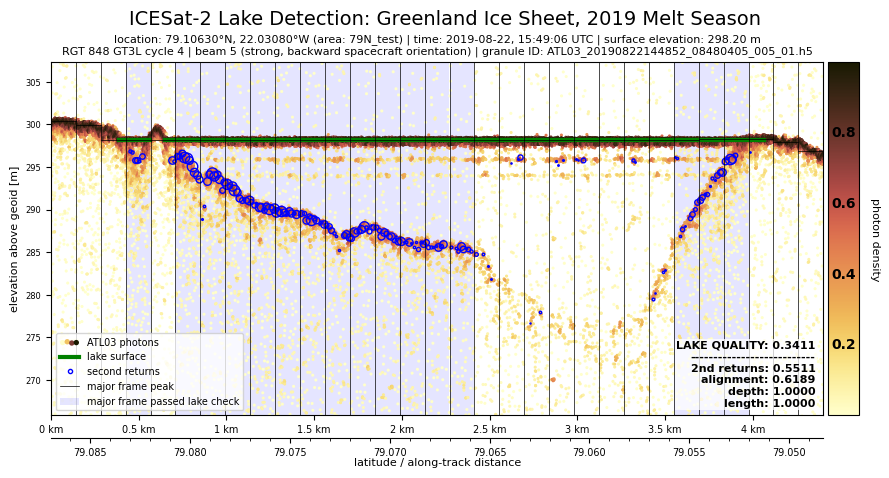

lake number: 4
https://openaltimetry.org/data/icesat2/elevation?product=ATL03&zoom_level=7&tab=photon&date=2019-08-22&minx=-22.050980858028854&miny=79.08696461061035&maxx=-22.010600452345596&maxy=79.1256358836705&tracks=848&mapType=arctic&beams=5
wrote to file: pklname
_______________________________________________________________________________



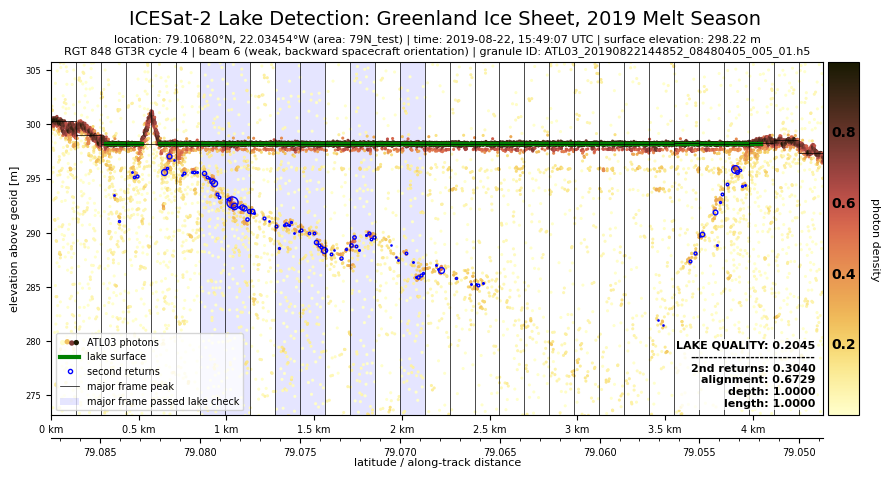

lake number: 4
https://openaltimetry.org/data/icesat2/elevation?product=ATL03&zoom_level=7&tab=photon&date=2019-08-22&minx=-22.054738965635288&miny=79.08747436895351&maxx=-22.014312264759546&maxy=79.12615411302558&tracks=848&mapType=arctic&beams=6
wrote to file: pklname
_______________________________________________________________________________



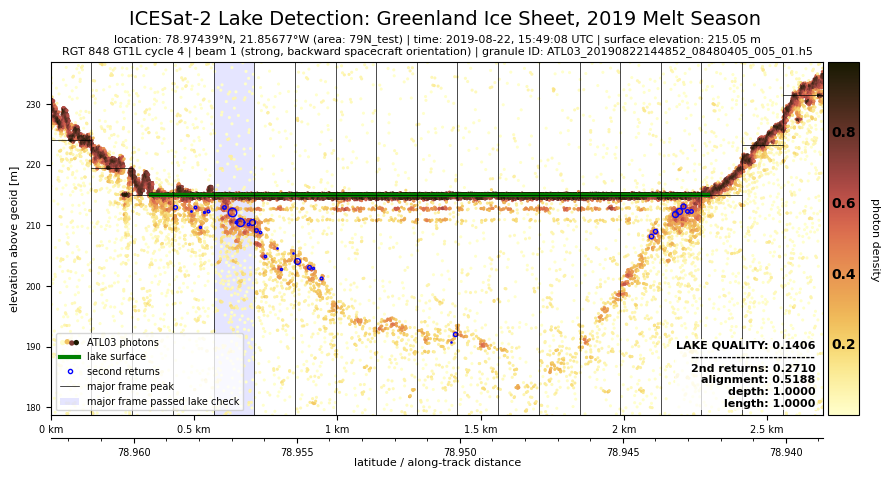

lake number: 4
https://openaltimetry.org/data/icesat2/elevation?product=ATL03&zoom_level=7&tab=photon&date=2019-08-22&minx=-21.869238168953178&miny=78.96253573659733&maxx=-21.84432038030172&maxy=78.98621984906339&tracks=848&mapType=arctic&beams=1
wrote to file: pklname
_______________________________________________________________________________



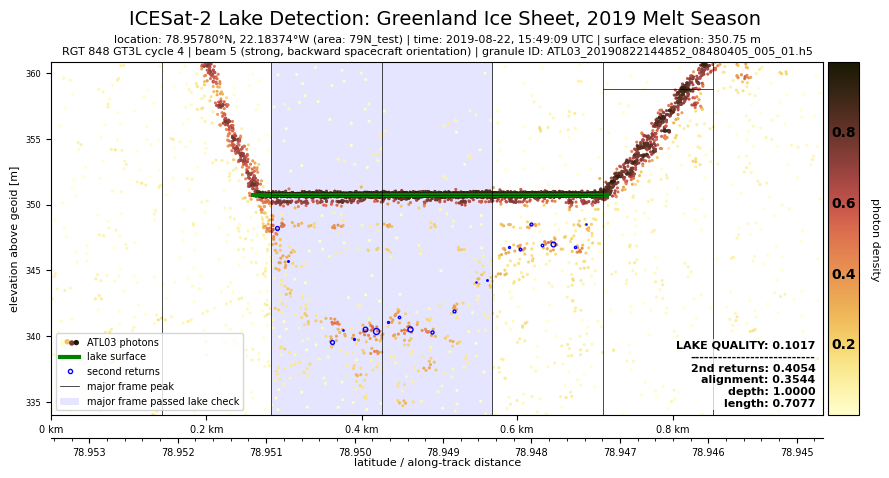

lake number: 4
https://openaltimetry.org/data/icesat2/elevation?product=ATL03&zoom_level=7&tab=photon&date=2019-08-22&minx=-22.188230452136725&miny=78.95343265501796&maxx=-22.179228538054026&maxy=78.9621652036798&tracks=848&mapType=arctic&beams=5
wrote to file: pklname
_______________________________________________________________________________



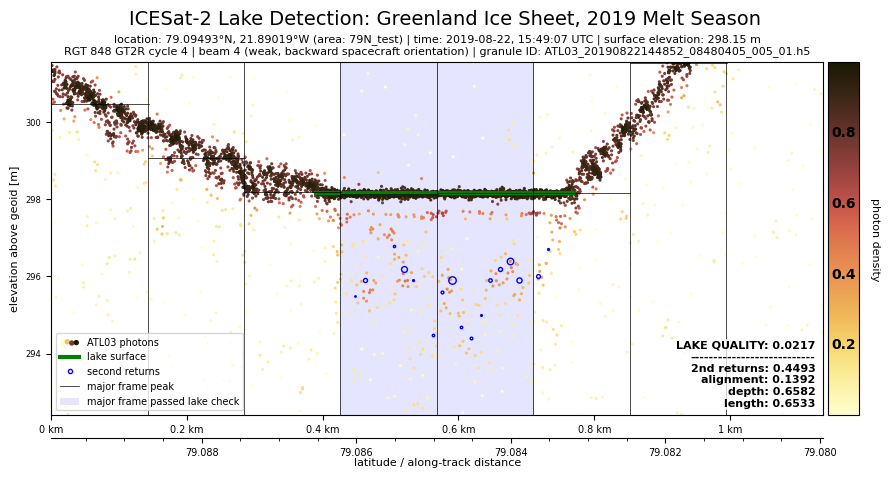

lake number: 4
https://openaltimetry.org/data/icesat2/elevation?product=ATL03&zoom_level=7&tab=photon&date=2019-08-22&minx=-21.895449181790084&miny=79.08994692762658&maxx=-21.88490884781792&maxy=79.099935169235&tracks=848&mapType=arctic&beams=4
wrote to file: pklname
_______________________________________________________________________________



In [9]:
from IPython.display import Image, display
import pickle
import numpy as np

quality_list = []
for i,lake in enumerate(lake_list):
    quality_list.append(lake.detection_quality)

sort_idxs = np.argsort(1-np.array(quality_list))
lake_list_ordered = [lake_list[i] for i in sort_idxs]

for lake in lake_list_ordered:
    
    fig = lake.plot_detected(min_width=0.0, min_depth=0.0)
    filename_base = 'lake_%05i_%s_%s_%s_%s_%s.jpg' % ((1-lake.detection_quality)*10000, lake.ice_sheet, lake.melt_season, 
                                                          lake.polygon_name, lake.granule_id[:-4], lake.gtx)
    figname = 'figs_quality/%s.jpg' % filename_base
    if fig is not None: fig.savefig(figname, dpi=300, bbox_inches='tight', pad_inches=0)
    display(fig)
    
    print('lake number: %i' % i)
    print(lake.oaurl)
    
    pklname = 'pickles/%s.pkl' % filename_base
    with open(pklname, 'wb') as f: pickle.dump(vars(lake), f)
    print('wrote to file: pklname')
    print('_______________________________________________________________________________', end='\n\n')

In [40]:
import os
import zipfile

for dirtozip in ['figs_quality', 'pickles']:
    filelist = [dirtozip+'/'+f for f in os.listdir(dirtozip) if os.path.isfile(os.path.join(dirtozip+'/', f))]
    ZipFile = zipfile.ZipFile("zip_test_%s.zip"%dirtozip, "w" )
    for file in filelist:
        ZipFile.write(file, compress_type=zipfile.ZIP_DEFLATED)
    ZipFile.close()